In [136]:
# Load the autoreload extension
%load_ext autoreload

# Set autoreload to automatically reload all modules
%autoreload 2

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import os


# Set the working directory to the parent directory
parent_directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
os.chdir(parent_directory)

from models.DecisionTree import build_tree, find_best_split, predict

# Verify the current working directory
print("Current working directory:", os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working directory: /Users/tomiwa.oladipo/Documents


In [ ]:
# define custom decision tree depth function
def count_depth(d):
    if not isinstance(d, dict) or not d:
        return 0
    return 1 + max(count_depth(v) for v in d.values())

In [3]:
breast_cancer = load_breast_cancer(as_frame=True)
df_breast_cancer = breast_cancer.data
arr_features = np.array(df_breast_cancer.copy())
arr_features.shape
arr_target = np.array(breast_cancer.target.copy())
arr_target.shape

(569,)

In [ ]:
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Build the decision tree
custom_tree = build_tree(arr_features, arr_target, max_depth=20)
depth = count_depth(custom_tree)
depth

7

In [ ]:
predictions = predict(arr_features, custom_tree)
# number of misclassifications
print(len(arr_target) - sum(predictions == arr_target))

In [ ]:

# row 68 is the first row that is not predicted correctly
a = 0
for bool in predictions == arr_target:
    a += 1
    if bool == False:
        print(a)
        break 
arr_features[68,:]

69


array([9.029e+00, 1.733e+01, 5.879e+01, 2.505e+02, 1.066e-01, 1.413e-01,
       3.130e-01, 4.375e-02, 2.111e-01, 8.046e-02, 3.274e-01, 1.194e+00,
       1.885e+00, 1.767e+01, 9.549e-03, 8.606e-02, 3.038e-01, 3.322e-02,
       4.197e-02, 9.559e-03, 1.031e+01, 2.265e+01, 6.550e+01, 3.247e+02,
       1.482e-01, 4.365e-01, 1.252e+00, 1.750e-01, 4.228e-01, 1.175e-01])

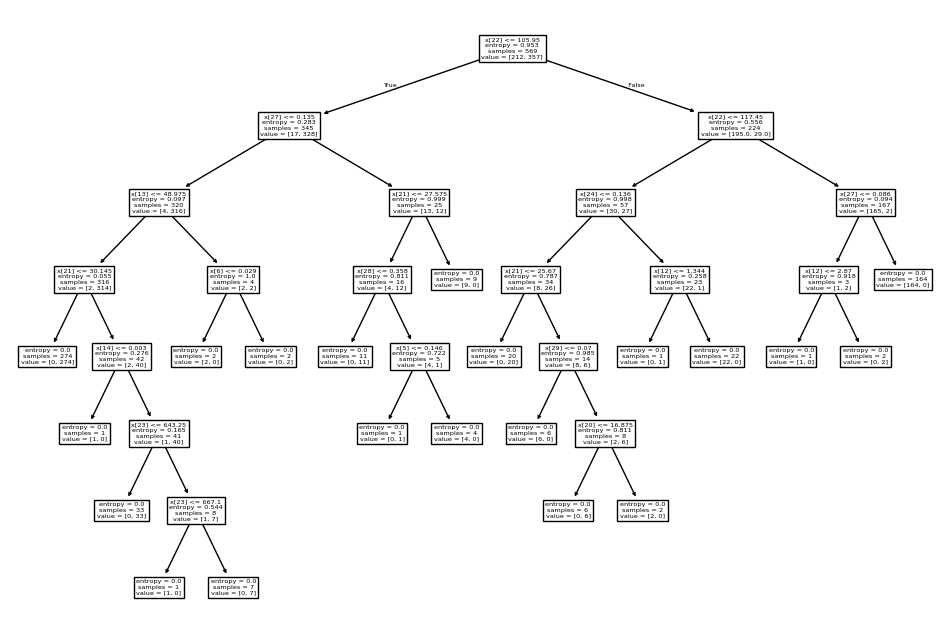

In [ ]:
# plot of sklearn decision tree

import matplotlib.pyplot as plt
from sklearn import tree

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(arr_features, arr_target)


# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf)
plt.show()
print(clf.get_depth())

In [ ]:
# accuracy of sklearn decision tree
sum(clf.predict(arr_features)==arr_target)/len(arr_target)

np.float64(1.0)